In [1]:
#dataframes
import pandas as pd
import h5py

import sys
sys.path.append('../')
import odor_statistics_lib as osm

# user defined functions

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

### Load Dataset

In [2]:
dir='~/DataAnalysis/data/Sprints/HighRes/'
fdf1 = pd.read_hdf(dir+"NotWindy/NotWindyStatsTime_std.h5")
fdf2 = pd.read_hdf(dir+"Windy/WindyStatsTime_std.h5")
# fdf3 = pd.read_hdf(dir+"Forest/ForestStatsTime_std.h5")

fdf = pd.concat([fdf1,fdf2])
fdf.reset_index(inplace=True, drop=True)

In [3]:
colormap='bone_r'

### Load Figure Layout

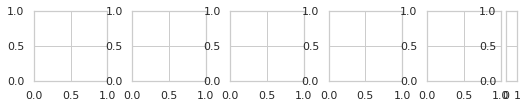

In [27]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/figOSindi.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

### Whiff Concentration

In [28]:
ax=layout.axes[('fig1','ax1')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.mean_concentration, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)
# ax.set_ylim(4,10)
# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_concentration", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('wc, v')
ax.yaxis.set_label_coords(-0.08, 0.5)

ax.set_xlabel('Distance from\nSource, m')
ax.xaxis.set_label_coords(0.5, -0.1)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[-1,1.8],
                            yticks=[4.5,10.5],
                            linewidth=0.5)

ax.set_xticklabels([r'$10^{-1}$',r'$10^{1.8}$'])


# ax.set_yticklabels(['0','10'])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/figOSindi.svg')

### Whiff Frequency

In [29]:
ax=layout.axes[('fig1','ax2')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.mean_ef, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)

# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_ef", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('wf, Hz')
ax.yaxis.set_label_coords(-0.08, 0.5)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,8],
                            linewidth=0.5)



figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/figOSindi.svg')

### Whiff Duration

In [30]:
ax=layout.axes[('fig1','ax3')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.length_of_encounter, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)

# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="log_whiff", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)
ax.set_ylabel('wd, s')
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.set_ylim(0,6)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,6],
                            linewidth=0.5)

# ax.set_yticklabels([r'$10^{-2.5}$',r'$10^{1.5}$'])
ax.tick_params(axis='y', which='major', pad=1)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/figOSindi.svg')

### Whiff Moving Average

In [31]:
ax=layout.axes[('fig1','ax4')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.whiff_ma, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)
ax.set_ylim(0,)
# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="whiff_ma", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('wma, v')
ax.yaxis.set_label_coords(-0.08, 0.5)


mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,10.5],
                            linewidth=0.5)

# ax.set_xticklabels([r'$10^{-1}$',r'$10^{1.8}$'])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/figOSindi.svg')

### Whiff Standard Deviation

In [32]:
ax=layout.axes[('fig1','ax5')]

var = ax.scatter(fdf.log_avg_dist_from_source_signed, fdf.std_whiff, 
                   c=fdf.mean_concentration, cmap=colormap,s=4, edgecolors='none', 
                 alpha=0.2, vmin=0, vmax=10, rasterized= True)
ax.grid(False)
# ax.set_ylim()
# g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="std_whiff", data=fdf, 
#             ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
# g1.set(xlabel=None, ylabel=None)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('wsd')
ax.yaxis.set_label_coords(-0.08, 0.5)



mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
#                             xticks=[-1,1.8],
                            yticks=[0,3],
                            linewidth=0.5)

ax.set_yticklabels(['0','2.5'])
# ax.tick_params(axis='y', which='major', pad=1)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/figOSindi.svg')

### Colorbar

In [33]:
ax = layout.axes[('fig1', 'cbar')]
ytic=[4.5,11]

fpl.colorbar(ax=ax, colormap='bone_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("wc, v",rotation=90, labelpad=-20)

ax.set_yticklabels(['4.5', '10'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/figOSindi.svg')